### Feature Engineering 

clean data --> Better Model result

Steps:

1. Exploratory Data Analysis - Raw data into useful data
   - How many numerical feature are there {histogram,pdf}
   - How many categorical features are there {category counts, uniwue values)
   - Missing Values {Visualize all the graphs)
   - Whether there are outliers {Bar plot}
   - Cleaning or not 
   
2. Handling missing values - mean, median, mode

3. Handling imbalanced dataset

4. Treating outliers

5. Scaling down the data {standardization,normalization}

6. Converting categorical features into numerical features)

### Types of Encoding for categorical variables

encoding techniques are used on categorical features

Nominal Encoding

  - One hot encoding
  - One hot encoding with many categorical variables
  - Mean encoding
  - Count/Frequency Encoding
  
Ordinal Encoding 

   - Label Encoding
   - Target Guided Ordinal Encoding

### What are categorical variables?

For example in our dataset, we have column named gender and it has two distinct value male and female. here the gender is categorical feature as it has two classes. In order to train the model we need to convert these classes or labels into numbers because model does not understand words but numbers. Because in model, we perform mathematical calculations. So we use some encoding techniques to converts categorical feature into some int values.

### Types of categorical Variables

##### Nominal Categorical Variables - 

categorical feature where we dont have to worry about the         arrangement of the variables. 

   ##### For Example:
   Gender column - male or female or state column 


##### Ordinal Categorical Variables - 

rearrange the categories based on rank 

   ##### For Example:
   education to predict salary PHD - rank 1, MS -rank 2 and a like)

### Nominal Encoding 
### One Hot Encoding

- applied to nominal categorical features

For example: Country feature
- Based on no of categories, we create the columns

Dummy variable trap (5-1) Delete one category column, if the all the category columns is 0 then it is evident that it belongs to skipped column. 

Disadvantages:

Suppose my categorical feature is zipcode. There wil be many pin codes there this is not efficient. There will be alot of new columns not good.

### One Hot Encoding with many categories

One hot encoding for top 10 labels of each categorical feature

### Advantages of one hot encoding of top 10 variables

- Straightforward to implement 
- Does not require hrs of variable exploration (which variable is more important)
- Does not expand massively the feature space (no of cols in dataset)

### Disadvantages of one hot encoding of top 10 variables

- does not add any information to make the variable more predictive
- does not keep the information of the ignored labels

###### In nutshell, when we apply one hot encoding of 10 most frequent variables. It kind of get rid of noisy variables which are not contributing much for the performance of model beacuse in dataset there will be some amount of noise data, which will not be very efficient for prediction. 

### Ordinal Encoding
### Label Encoding

Education column : PHD, MS, BS based on rank we get number to it like 

- PHD - 4 
- MS - 3 
- BS - 2 and so on 

label with highest rank will be give higher value



### Mean Encoding

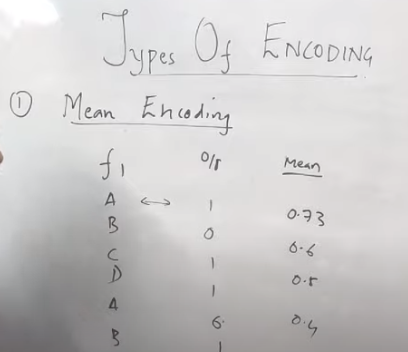

for each label, we check the target label and get the mean of target ouput for each label. 

we will convert it in mean values.

It will be used in scenerio as in pin code. instead of performing one hot encoding and get 999 more feature columns, we use mean encoding

### Target Guided Ordinal Encoding

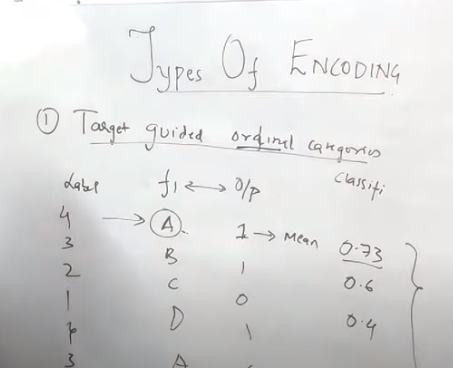

For classification problem:

we consider target variable and categorical feature

and ouput as 0 and 1. For each label, we calculate means where we see target label as 1. And based on the mean we assign ranks to the labels. label with highest means will be assigned highest value. 

### One hot Encodig - variables with many categories

In [10]:
import numpy as np
import pandas as pd
#Lets load only categorical variables
data = pd.read_csv('mercedes-benz.csv',usecols=['X1','X2','X3','X4','X5','X6'])

In [30]:
# data.head()

In [31]:
# see how many classes each categorical feature has
for col in data.columns:
    print(f'{col} : {len(data[col].unique())} labels')

### get_dummies()

Notice above, how every new dummy column has at least one "1" within it? This is because every variable is accounted for with a True (1) indicator. 

However, what if a row was all 0s? This is also a way to identify one of your values. drop_first allows you to drop your first variable and identify it through all other columns being 0.


In [29]:
# lets examine how many columns will obtain after one hot encoding

pd.get_dummies(data,drop_first=True).shape

(4209, 117)

We can observe that from with just 6 categorical features we are getting 117 features with the help of one hot encoding. Not good!!!!

### Issue when there are a lot of categories so lets look at the solution

KDD Cup Orange Challenge
What can we do instead?

http://proceedings.mlr.press/v7/niculescu09/niculescu09.pdf In the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble

#### The Team suggested using 10 most frequent labels convert them into dummy variables using onehotencoding

This means they will make one binary variables for each of the 10 most frequent labels of the variables only. And gruping all the other labels under new category. That in this case will be dropped. Thus the 10 new dummy variables indicate if one of the 10 most frequent labels is present or not for particular observation. 

no of selected frequent label may change according to no of categorical labels number.

How can we do that in python?

In [25]:
# # lets try to find top 10 most frequent categories for variabl X2

# data.X2.value_counts().sort_values(ascending=False).head(10)

In [45]:
# lets make the list with most frequent categories of the variable

top_10 = [x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]

In [46]:
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [50]:
# now we make 10 binary variables 

for label in top_10:
    data[label] = np.where(data['X2']==label, 1,0)

In [24]:
# data[['X2']+top_10].head(41)

### One hot encoding for top 10 labels of each categorical feature X1,X2,X3,X4,X5,X6

In [23]:
data = pd.read_csv('mercedes-benz.csv',usecols=['X1','X2','X3','X4','X5','X6'])
#Calculate top 10 for 'X1'
top_10_X1 = [x for x in data.X1.value_counts().sort_values(ascending=False).head(10).index]

def one_hot_top_x(data, column, top_10):
    for label in top_10:
        data[column + '_' + label] = np.where(data[column]==label, 1,0)
# One hot encoding for top 10 labels of 'X1'
one_hot_top_x(data, 'X1', top_10_X1)
    
data.head(20)

after doing one hot encoding you can drop X1,X2,X3,X4,X5,X6 columns

### Count and Frequency Encoding

Another way to refer to variables that have a multitude of categories, is to call them variables with high cardinality.

If we have categorical variables containing many multiple labels or high cardinality,then by using one hot encoding, we will expand the feature space dramatically.

One approach that is heavily used in Kaggle competitions, is to replace each label of the categorical variable by the count, this is the amount of times each label appears in the dataset. Or the frequency, this is the percentage of observations within that category. The 2 are equivalent.

Let's see how this works:

In [20]:
df = pd.read_csv('mercedes-benz.csv',usecols = ['X1','X2'])

In [21]:
df.head()

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n


In [22]:
df.shape

(4209, 2)

In [23]:
pd.get_dummies(df).shape

(4209, 71)

### My code

In [24]:

# for i,j in df['X1'].value_counts(),df[]:
#     print(i)

count = df['X1'].value_counts()
value_count = dict(count)

for label, count in value_count.items():
#     print(label,count)
    df.loc[(df.X1 == label),'X1']=count


In [25]:
print(df.head())

    X1  X2
0  408  at
1   31  av
2   52   n
3   31   n
4  408   n


## Easy way

In [29]:
# to replace X2 labels in dataset df

df_frequency_map = df['X2'].value_counts().to_dict()
df.X2 = df.X2.map(df_frequency_map)

df.head()

,X1,X2
0,408,12
1,31,12
2,52,137
3,31,137
4,408,137


### Advantages 

- Simple to implement
- Does not increase feature dimensional space

### Disadvantages

- if some of the labels have the same count, then they will be replaced with the same count and they will loose some valuable information. 

- adds somewhat arbitrary nmbers and therfore weights to the different labels, that may not be related to their predictive power. 

### Ordinary Categories - Ordinal Encoding

 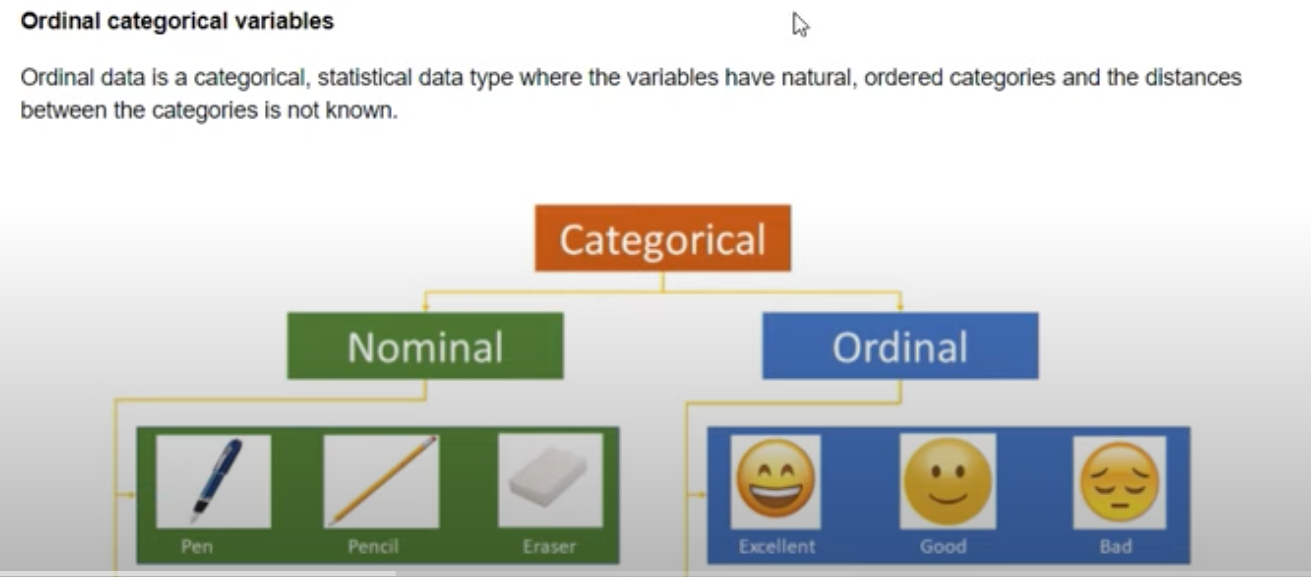

For example:

Student's grade in an exam (A, B, C or Fail).
Educational level, with the categories: Elementary school, High school, College graduate, PhD ranked from 1 to 4.
When the categorical variables are ordinal, the most straightforward best approach is to replace the labels by some ordinal number based on the ranks.

In [53]:
import datetime

In [54]:
df_base = datetime.datetime.today()
df_date_list = [df_base - datetime.timedelta(days=x) for x in range(0,20)]
df=pd.DataFrame(df_date_list)
df.columns = ['day']

In [55]:
df['day_of_week'] = df['day'].dt.day_name()

In [56]:
df

,day,day_of_week
0,2022-01-21 15:26:47.023356,Friday
1,2022-01-20 15:26:47.023356,Thursday
2,2022-01-19 15:26:47.023356,Wednesday
3,2022-01-18 15:26:47.023356,Tuesday
4,2022-01-17 15:26:47.023356,Monday
5,2022-01-16 15:26:47.023356,Sunday
6,2022-01-15 15:26:47.023356,Saturday
7,2022-01-14 15:26:47.023356,Friday
8,2022-01-13 15:26:47.023356,Thursday
9,2022-01-12 15:26:47.023356,Wednesday


In [57]:
weekday_map = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [58]:
df['day_of_week'] = df['day_of_week'].map(weekday_map)

In [59]:
df.head()

,day,day_of_week
0,2022-01-21 15:26:47.023356,5
1,2022-01-20 15:26:47.023356,4
2,2022-01-19 15:26:47.023356,3
3,2022-01-18 15:26:47.023356,2
4,2022-01-17 15:26:47.023356,1


Suppose want to hire person and predict value and have education and predict the salary

### Ordinal Measurement Advantages
Ordinal measurement is normally used for surveys and questionnaires. Statistical analysis is applied to the responses once they are collected to place the people who took the survey into the various categories. The data is then compared to draw inferences and conclusions about the whole surveyed population with regard to the specific variables. The advantage of using ordinal measurement is ease of collation and categorization. If you ask a survey question without providing the variables, the answers are likely to be so diverse they cannot be converted to statistics.

With Respect to Machine Learning

Keeps the semantical information of the variable (human readable content)
Straightforward
### Ordinal Measurement Disadvantages
The same characteristics of ordinal measurement that create its advantages also create certain disadvantages. The responses are often so narrow in relation to the question that they create or magnify bias that is not factored into the survey. For example, on the question about satisfaction with the governor, people might be satisfied with his job performance but upset about a recent sex scandal. The survey question might lead respondents to state their dissatisfaction about the scandal, in spite of satisfaction with his job performance -- but the statistical conclusion will not differentiate.

With Respect to Machine Learning

Does not add machine learning valuable information


### Why Feature Scaling?



 it is neccessary to get all the feature on same scale. Like in KNM, If we consider unscaled features the distance between them may be huge. we have scale down the values in such a way that each and every feature that we have, we will perform som feature scaling. 
 
In height in cm, weight in kg, the value differ a lot. so neeed same scale.

### Model requiring Feature Scaling - where we used euclidean distance 

- Linear Regression - we use gradient descent to find cofficient. and it should converge to global minima. if we dont scale it, random parameter will be far away but when we apply feature scale cobvergence will be faster. 

- KNN

- K means (unsupervised Clustering)

- Logistic Regression

- Compulsory to do feature scaling in deep learning as we use gradient descent.  

### Model does not require feature scaling

- Decison tree
- Random Forest
- Boostings 

### Types of Scaling:

Standard scaling
Min Max scaling


### Handling missing values in categorical Variables

### Different Ways

Way 1 - Delete the rows when you have large dataset but it may not be appropriate approach if you have less number of records in dataset.

Way 2 - Replace with most frequent value (suppose i have gender feature and most of the time female is coming up in dataset, then I can fill the missing variable with female). But this may lead to imbalanced dataset within the category

Way 3 - Most Efficient Technique to apply classifier algorithm to predict missing values. 

So in this case all other features and target label becomes feature and we try to predict gender with the help of some clssifier say KNN. And we provide record where we have gender values as training set and use the record with missing gender categories as testing set and get the predict for each record and replace the missing label with the predicted lable for gender feature. 

Way 4 - Apply unsupervised ML - skip gender column and all the other features and not require output. I need two clusters for gender. apply on records with missing values. 

Way 5- Replace all the missing values with new class label Missing


### Feature Transformation

Why Transformation of features are required?

1. Linear Regression -- Gradient Descent-- Global Minima
2. Models like KNN, Kmeans, Hierarchical Clustering - Euclidean Distance

Every point has some vector and direction

Deep learning Techniques(Standardization, Scaling) 1. ANN--Global Minima, Gradient Descent

0-255 pixels

### Types of Feature Transformation

1. Normalization and Standardization
2. Scaling to Minimum and Maximum values
3. Scaling to Median and Quantiled
4. Guassian Transformation
5. Logarithmic Transformation
6. Reciprocal Trnasformation
7. Square Root Transformation
8. Exponential Transformation
9. Box Cox Transformation

### Standardization (Why standardization?)

Standardization comes into picture when features of input data set have large differences between their ranges or simply when they are measured in different measurement units (e.g: Pounds, Meters, Miles etc)

We try to bring all the variables of features to a similar scale, standardization means centering the variables at zero z=(x-x_mean)/std

In [107]:
df=pd.read_csv('titanic.csv',usecols=['Survived','Pclass','Age','Fare'])

In [108]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [109]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [110]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [111]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [112]:
#Divide to independent and dependent features
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [113]:
df.loc[0:2]

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250


In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.33)

In [106]:
## standarization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)

In [78]:
X_train_scaled

array([[-0.37724546,  1.87618601, -0.37017142],
       [-0.37724546, -1.65701564,  0.1301347 ],
       [ 0.81870291,  0.03277645, -0.32398932],
       ...,
       [ 0.81870291, -0.12084101, -0.5044118 ],
       [ 0.81870291,  1.33852489, -0.35917569],
       [ 0.81870291, -0.12084101, -0.46913308]])

### Min Max Scaling (CNN) - Deep Learning Techniques

It scales the values between 0 aro 1. X_scaled = (X-Xmin) / (Xmax-Xmin)

In [94]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

In [96]:
df_minmax =pd.DataFrame(min_max.fit_transform(X_train),columns=X_train.columns)
df_minmax.head()

,Pclass,Age,Fare
0,1.0,0.181781,0.015330
1,1.0,0.263603,0.015330
2,1.0,0.277240,0.015469
3,1.0,0.427247,0.015713
4,0.0,0.645438,0.077294


### Robust Scaler

It is robust to outliers. It is used to scale the feature to median and quantles. Scaling using median and quantile consists of subtracting the median to all the observations and then dividing by interquantile difference. Interquantile is difference between 25th and 75 quantile

IQR = 75th - 25th quantile

X_scale =(X-X.median)/IQR

0,1,2,3,4,5,6,7,8,9

9 - 90percentile - 90% of all the values int his group is less than 9 
1 - 10 percentile - 10% of all the valus in this group is less than 1

In [118]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
df_robust_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [119]:
df_robust_scaled.head()

,Pclass,Age,Fare
0,-1.0,-0.285714,2.188516
1,0.0,0.035714,0.069339
2,-2.0,0.571429,4.572048
3,-1.0,-0.357143,-0.065005
4,0.0,-0.357143,-0.284940


### Guassian Transformation

Some machine learnig algorithms like linear and logistic assume that features are normally distributed. All help to transform to guassian. All we need to perform experiments and pick which gives best result.

- Logarithmic Transformation
- Reciprocal Trnasformation
- Square Root Transformation
-  Exponential Transformation


In [155]:
import scipy.stats as stat
import pylab
import matplotlib.pyplot as plt
df=pd.read_csv('titanic.csv',usecols=['Survived','Pclass','Age','Fare'])

In [156]:
## if we want to check whether feature is guassian or normal distribution
## Q-Q Plot

def plot_data(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',fit=True,plot=pylab)

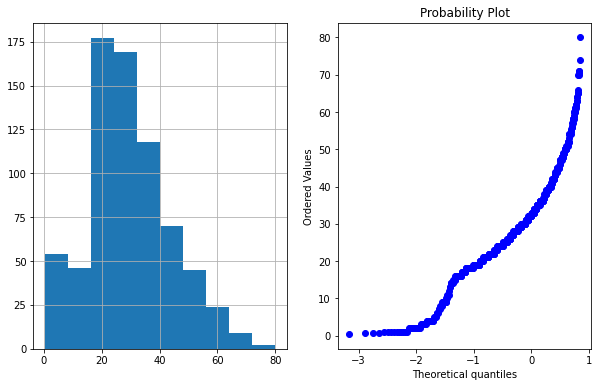

In [142]:
##looks like right skewed distribution 
## if it is straight line then guassian 
plot_data(df,'Age')

### Logarithmic Transformation

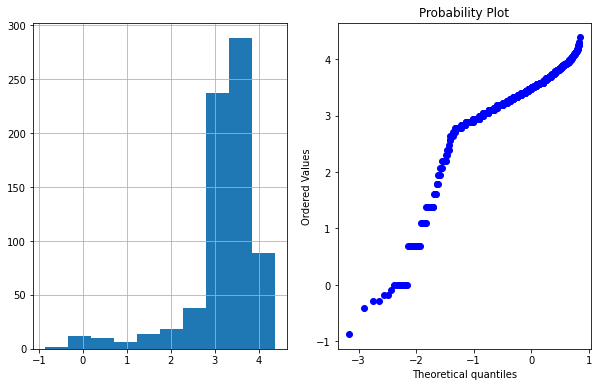

In [144]:
#data become left skewed so this is not useful
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

### Reciprocal Transformation

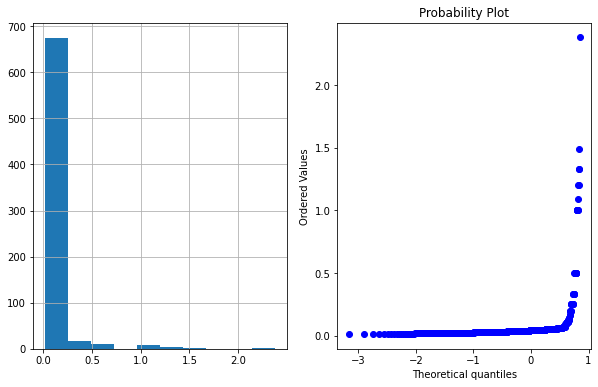

In [145]:
# right skewed 

df['Age_reciprocal'] = 1/df.Age
plot_data(df,'Age_reciprocal')

### Square Root Transformation

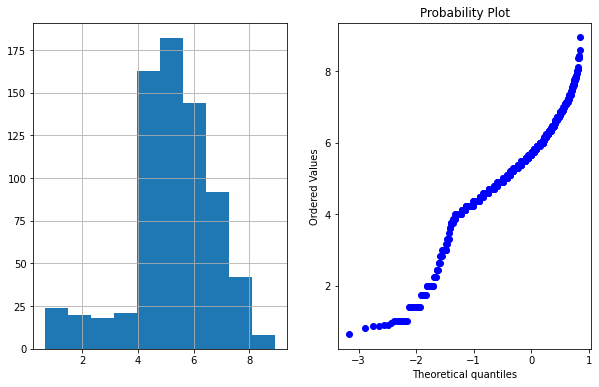

In [148]:
#little bit left skewed
df['Age_reciprocal'] = df.Age**0.5
plot_data(df,'Age_reciprocal')

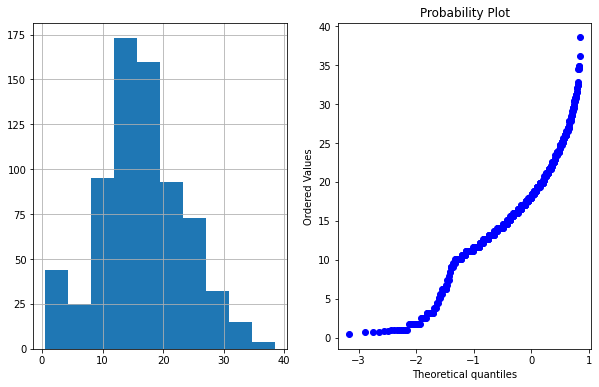

In [151]:
#best result as guassian distribution
df['Age_reciprocal'] = df.Age**(1/1.2)
plot_data(df,'Age_reciprocal')

###  Box Cox Transformation

T(Y)=(Y exp(lambda)-1)/lambda

where Y is a response variable and lambda is transformation parameter. lambda varies between -5 to 5. 

In the transformation, all values of lambda are considered and the optimal value of a given variable is selected.

In [163]:
df['Age_boxcox'].parameters=stat.boxcox(df.Age)

In [164]:
print(parameters)

8.472135811722177


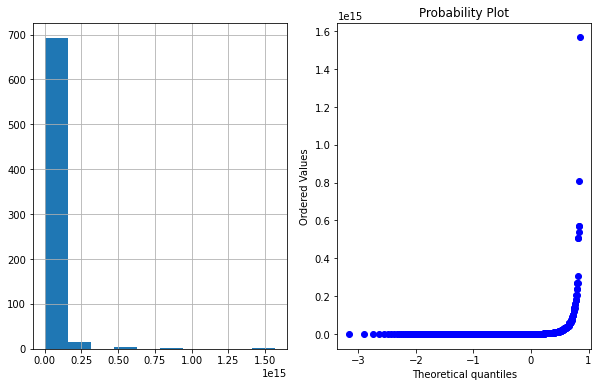

In [165]:
plot_data(df,'Age_boxcox')